### Algerian forest fires Dataset
data set information:
the dataset  includes  244 instance that  regroup a data of two regions of Algeria, namely the bejaia  region located in the northest of ALgeria and the sidi  bel-abbes locatedd in the northwest of Algeria.

122 instance for each region

the period from june 2012 to september 2012. the dataset  includes 11 attributes and 1 output attribute (class) the 244 instance have been classified into fire (138 classes) and not fire (106 classes) classes.

#### Attribute information:
1 - date: (DDMMYYYY) day, month, year , (june to sept,  2012) Weather  observations
2 - Temp: temperature noon (temperature max) in Celsius degrees: 22t0 42
3 - WS: wind speed in km/h 6 to 29
4 - RH : Relative Humidity in % 21 to 90
5 - Rain: total day in mm: 0 to 16.8 FWI components
6 - fine fuel mositure code (ffmc) index from the fWI system 28 to 92.5
7 - duff moisture code (DMC) index from the FWI system: 1.1 to 65.9
8 - drought code (DC) index from the  FWI system 0 to 18.5
9 -  initail spread index (ISI) index from the FWI system 1.1 to 68
11 - fire weather index (FWI) index  0 to 31.1
12 - classes: two classes, namely fire and not  fire

In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 


In [153]:
dataset = pd.read_csv('Algerian_forest_fires_dataset.csv', header=1)
dataset.head()


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [154]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


## Data cleaning

In [155]:
## missing values
dataset.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
dtype: int64

In [156]:
dataset[dataset.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


The dataset is converted into two sets based on region from 122th index, we can make a new column based on the region

1 'bejaia region data set
2 'sidi bel abbes region dataset
add new column with region

In [157]:
dataset.loc[:122, 'Region'] =0
dataset.loc[:122, 'Region'] = 1
df = dataset

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          246 non-null    object 
 1   month        245 non-null    object 
 2   year         245 non-null    object 
 3   Temperature  245 non-null    object 
 4    RH          245 non-null    object 
 5    Ws          245 non-null    object 
 6   Rain         245 non-null    object 
 7   FFMC         245 non-null    object 
 8   DMC          245 non-null    object 
 9   DC           245 non-null    object 
 10  ISI          245 non-null    object 
 11  BUI          245 non-null    object 
 12  FWI          245 non-null    object 
 13  Classes      244 non-null    object 
 14  Region       123 non-null    float64
dtypes: float64(1), object(14)
memory usage: 29.0+ KB


In [159]:
df['Region']= df['Region'].astype('Int64')


In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
 14  Region       123 non-null    Int64 
dtypes: Int64(1), object(14)
memory usage: 29.2+ KB


In [161]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,1
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,1
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,1


In [162]:
df.isnull().sum()

day              0
month            1
year             1
Temperature      1
 RH              1
 Ws              1
Rain             1
FFMC             1
DMC              1
DC               1
ISI              1
BUI              1
FWI              1
Classes          2
Region         123
dtype: int64

#### Remove the null values

In [163]:
df = df.dropna().reset_index(drop=True)

In [164]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,1
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,1
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,1


In [165]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [166]:
df.iloc[[0]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1


In [167]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

### Fix spaces in columns names

In [168]:
df.columns = df.columns.str.strip()

In [169]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [170]:
df.info

<bound method DataFrame.info of     day month  year Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI  BUI  FWI  \
0    01    06  2012          29  57  18     0  65.7  3.4   7.6  1.3  3.4  0.5   
1    02    06  2012          29  61  13   1.3  64.4  4.1   7.6    1  3.9  0.4   
2    03    06  2012          26  82  22  13.1  47.1  2.5   7.1  0.3  2.7  0.1   
3    04    06  2012          25  89  13   2.5  28.6  1.3   6.9    0  1.7    0   
4    05    06  2012          27  77  16     0  64.8    3  14.2  1.2  3.9  0.5   
..   ..   ...   ...         ...  ..  ..   ...   ...  ...   ...  ...  ...  ...   
117  26    09  2012          31  54  11     0    82    6  16.3  2.5  6.2  1.7   
118  27    09  2012          31  66  11     0  85.7  8.3  24.9    4    9  4.1   
119  28    09  2012          32  47  14   0.7  77.5  7.1   8.8  1.8  6.8  0.9   
120  29    09  2012          26  80  16   1.8  47.4  2.9   7.7  0.3    3  0.1   
121  30    09  2012          25  78  14   1.4    45  1.9   7.5  0.2  2.4  0.1

### change the required columns as integer data type

In [171]:
df[['month', 'day', 'year', 'Temperature', 'RH', 'Ws']].astype('Int64')

,month,day,year,Temperature,RH,Ws
0,6,1,2012,29,57,18
1,6,2,2012,29,61,13
2,6,3,2012,26,82,22
3,6,4,2012,25,89,13
4,6,5,2012,27,77,16
...,...,...,...,...,...,...
117,9,26,2012,31,54,11
118,9,27,2012,31,66,11
119,9,28,2012,32,47,14
120,9,29,2012,26,80,16


In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          122 non-null    object
 1   month        122 non-null    object
 2   year         122 non-null    object
 3   Temperature  122 non-null    object
 4   RH           122 non-null    object
 5   Ws           122 non-null    object
 6   Rain         122 non-null    object
 7   FFMC         122 non-null    object
 8   DMC          122 non-null    object
 9   DC           122 non-null    object
 10  ISI          122 non-null    object
 11  BUI          122 non-null    object
 12  FWI          122 non-null    object
 13  Classes      122 non-null    object
 14  Region       122 non-null    Int64 
dtypes: Int64(1), object(14)
memory usage: 14.5+ KB


### Changing the other columns to float data types

In [173]:
objects = [features for features in df.columns if df[features].dtypes=='O']

In [174]:
for i in objects:
    if i!= 'Classes':
        df[i] = df[i].astype(float)

In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          122 non-null    float64
 1   month        122 non-null    float64
 2   year         122 non-null    float64
 3   Temperature  122 non-null    float64
 4   RH           122 non-null    float64
 5   Ws           122 non-null    float64
 6   Rain         122 non-null    float64
 7   FFMC         122 non-null    float64
 8   DMC          122 non-null    float64
 9   DC           122 non-null    float64
 10  ISI          122 non-null    float64
 11  BUI          122 non-null    float64
 12  FWI          122 non-null    float64
 13  Classes      122 non-null    object 
 14  Region       122 non-null    Int64  
dtypes: Int64(1), float64(13), object(1)
memory usage: 14.5+ KB


In [176]:
objects

['day',
 'month',
 'year',
 'Temperature',
 'RH',
 'Ws',
 'Rain',
 'FFMC',
 'DMC',
 'DC',
 'ISI',
 'BUI',
 'FWI',
 'Classes']

In [177]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,122.000000,122.000000,122.0,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.0
mean,15.754098,7.500000,2012.0,31.180328,67.975410,16.000000,0.842623,74.672951,12.314754,53.160656,3.655738,15.426230,5.577869,1.0
std,8.843274,1.115259,0.0,3.320401,11.154411,2.848807,2.409208,15.558713,11.274360,51.778265,3.021768,14.474302,6.343051,0.0
min,1.000000,6.000000,2012.0,22.000000,45.000000,11.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,1.0
25%,8.000000,7.000000,2012.0,29.000000,60.000000,14.000000,0.000000,65.925000,3.725000,10.050000,1.125000,5.100000,0.500000,1.0
50%,16.000000,7.500000,2012.0,31.000000,68.000000,16.000000,0.000000,80.900000,9.450000,35.550000,2.650000,11.200000,3.000000,1.0
75%,23.000000,8.000000,2012.0,34.000000,77.750000,18.000000,0.500000,86.775000,16.300000,79.025000,5.600000,21.675000,8.700000,1.0
max,31.000000,9.000000,2012.0,37.000000,89.000000,26.000000,16.800000,90.300000,54.200000,220.400000,12.500000,67.400000,30.200000,1.0


In [178]:
### Let's save the cleaned dataset
df.to_csv("Algerian_forest_fires_cleaned_dataset.csv", index=False)

### Exploratory Data Ananlysis

In [179]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1.0,6.0,2012.0,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,2.0,6.0,2012.0,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,1
2,3.0,6.0,2012.0,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,4.0,6.0,2012.0,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,1
4,5.0,6.0,2012.0,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,1


In [180]:
df_copy = df.drop(['day', 'month', 'year'], axis=1)

In [181]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,1
2,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,1
4,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,1


### Encoding of the categories in classes

In [182]:
df_copy['Classes'] = np.where(df_copy['Classes'].str.contains('not fire'), 0,1)

In [183]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,1
1,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,1
2,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,1
3,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,1
4,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,1


In [184]:
## categories in thhe claess
df_copy['Classes'].value_counts()

Classes
0    63
1    59
Name: count, dtype: int64

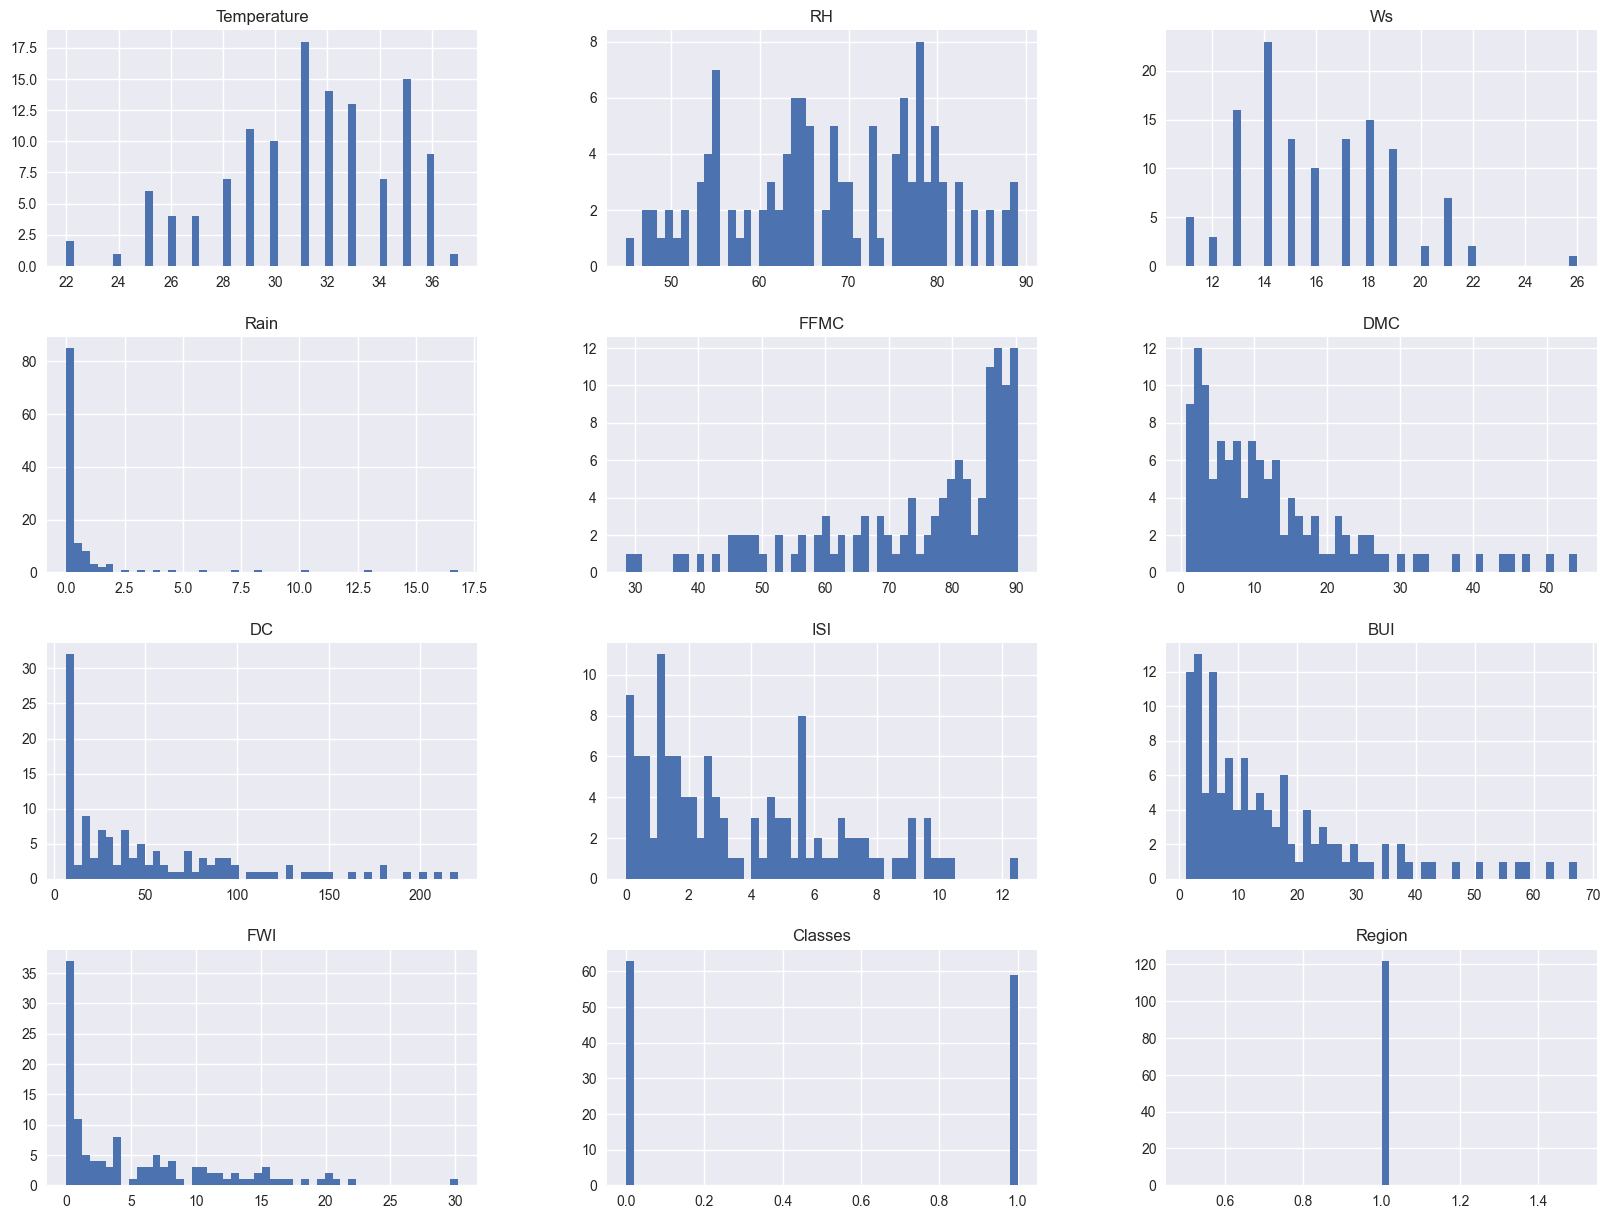

In [186]:
### Plot density plot for all features
plt.style.use('seaborn-v0_8')
df_copy.hist(bins=50,  figsize=(20,15))
plt.show()

In [187]:
## percentage for pie chart

In [190]:
percentage = df_copy['Classes'].value_counts(normalize=True)*100

Text(0.5, 1.0, 'Pie Chart of Classes')

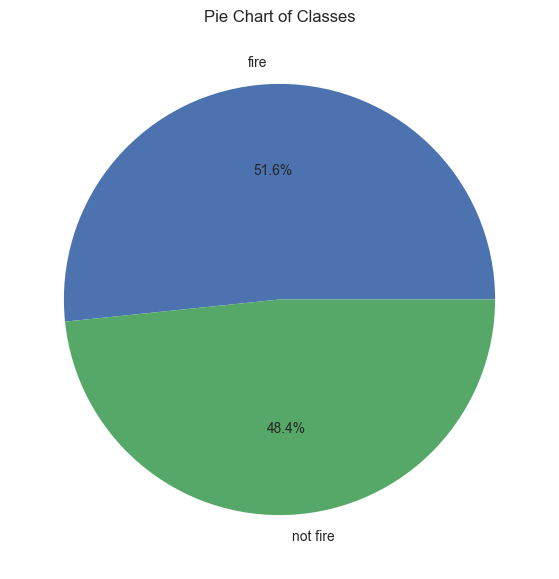

In [191]:
## Plotting pie chart
class_labels = ['fire', 'not fire']
plt.figure(figsize=(12,7))
plt.pie(percentage, labels= class_labels, autopct='%1.1f%%')
plt.title('Pie Chart of Classes')

In [192]:
df_copy.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.660151,-0.228035,-0.486947,0.748423,0.541489,0.532838,0.663871,0.542210,0.608367,0.497810,NaN
RH,-0.660151,1.000000,0.245774,0.329163,-0.653153,-0.347080,-0.314271,-0.586410,-0.338233,-0.476067,-0.377328,NaN
Ws,-0.228035,0.245774,1.000000,0.349321,-0.211069,0.039394,0.099231,-0.039266,0.062212,0.029637,-0.121408,NaN
Rain,-0.486947,0.329163,0.349321,1.000000,-0.573476,-0.265371,-0.283652,-0.366425,-0.271951,-0.292914,-0.334392,NaN
FFMC,0.748423,-0.653153,-0.211069,-0.573476,1.000000,0.608512,0.575221,0.790086,0.600707,0.675553,0.743637,NaN
DMC,0.541489,-0.347080,0.039394,-0.265371,0.608512,1.000000,0.962193,0.750098,0.995551,0.901759,0.616951,NaN
DC,0.532838,-0.314271,0.099231,-0.283652,0.575221,0.962193,1.000000,0.717591,0.982554,0.869911,0.588464,NaN
ISI,0.663871,-0.586410,-0.039266,-0.366425,0.790086,0.750098,0.717591,1.000000,0.746761,0.944062,0.831796,NaN
BUI,0.542210,-0.338233,0.062212,-0.271951,0.600707,0.995551,0.982554,0.746761,1.000000,0.900417,0.612576,NaN
FWI,0.608367,-0.476067,0.029637,-0.292914,0.675553,0.901759,0.869911,0.944062,0.900417,1.000000,0.759758,NaN
